<a href="https://colab.research.google.com/github/ROgue-07/Liver/blob/main/Liver_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
from numpy import loadtxt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, cohen_kappa_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
#for oversampling
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data Sets/Liver Disease/Liver Patient Dataset (LPD)_train.csv', encoding = 'unicode_escape')
datat = pd.read_excel("/content/drive/MyDrive/Data Sets/Liver Disease/test.csv.xlsx")
print(data.shape)
data.head()

(30691, 11)


,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [ ]:
datat.head()

,66,Female,0.9,0.2,210,35,32,8,3.9,0.9.1
0,50,Male,9.4,5.2,268,21,63,6.4,2.8,0.8
1,42,Female,3.5,1.6,298,68,200,7.1,3.4,0.9
2,65,Male,1.7,0.8,315,12,38,6.3,2.1,0.5
3,22,Male,3.3,1.5,214,54,152,5.1,1.8,0.5
4,31,Female,1.1,0.3,138,14,21,7.0,3.8,1.1


In [ ]:
data.columns=['age','gender','TB','DB','AAP','SGPT','SGOT','TP','ALB','A/G','Label']

In [ ]:
data.isnull().sum()

age         2
gender    902
TB        648
DB        561
AAP       796
SGPT      538
SGOT      462
TP        463
ALB       494
A/G       559
Label       0
dtype: int64

In [ ]:
data['gender'].replace('Female',1,inplace=True)
data.gender.replace('Male',0,inplace=True)
#null impute
data.age=data.age.fillna(data.age.mean())
data.gender=data.gender.fillna(1.0)
data.TB=data.TB.fillna(data.TB.mean())
data.ALB=data.ALB.fillna(data.ALB.mean())
data.DB=data.DB.fillna(data.DB.median())
data.AAP =data.AAP.fillna(data.AAP.median())
data.SGPT =data.SGPT.fillna(data.SGPT.median())
data.SGOT =data.SGOT.fillna(data.SGOT.median())
data.TP =data.TP.fillna(data.TP.median())
data.Label.replace(2,0,inplace=True)
data['A/G'] =data['A/G'].fillna(data['A/G'].median())

In [ ]:
#oversampling on basis of label
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]
Data_rs=RandomOverSampler(sampling_strategy='minority')
X_res, Y_res = Data_rs.fit_resample(X, Y)

In [ ]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(Y_res)))

Original dataset shape Counter({1: 21917, 0: 8774})
Resampled dataset shape Counter({1: 21917, 0: 21917})


In [ ]:
np.random.seed(0)
X_train, X_test, Y_train, Y_test = train_test_split(X_res, Y_res, test_size=0.20,random_state=106)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(35067, 10)
(8767, 10)
(35067,)
(8767,)


**DECISION TREE SEGMENT**

In [ ]:
#np.random.seed(0)
dt_model=DecisionTreeClassifier(random_state=101)
dt_model.fit(X_train, Y_train)

#Predict
#np.random.seed(0)
y_dt_pred = dt_model.predict(X_test)

In [ ]:
print("DT Accuracy:",accuracy_score(Y_test, y_dt_pred))
print('DT Precision: %.3f' % precision_score(Y_test, y_dt_pred))
print('DT Recall: %.3f' % recall_score(Y_test, y_dt_pred))
print('DT F1 Score: %.3f' % f1_score(Y_test, y_dt_pred))
print('DT Confusion matrix: \n', confusion_matrix(Y_test, y_dt_pred))
print('cohens kappa \n', cohen_kappa_score(Y_test, y_dt_pred))
print('ROC_AUC score \n', roc_auc_score(Y_test, y_dt_pred))

DT Accuracy: 0.9962358845671268
DT Precision: 0.997
DT Recall: 0.996
DT F1 Score: 0.996
DT Confusion matrix: 
 [[4355   15]
 [  18 4379]]
cohens kappa 
 0.9924717135979232
ROC_AUC score 
 0.9962369027353266


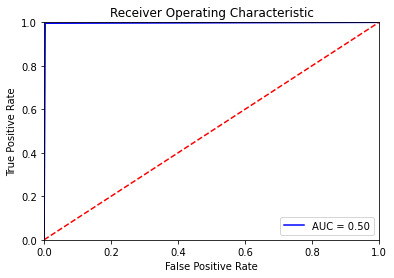

In [ ]:
#print(classification_report(Y_test, y_pred))
fprDT, tprDT, thresholdDT = roc_curve(Y_test, y_dt_pred)
roc_auc = auc(fprDT, thresholdDT)

plt.title('Receiver Operating Characteristic')
plt.plot(fprDT, tprDT, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization


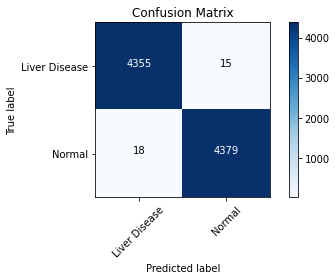

In [ ]:
# Custom method for plotting the Confusion Matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plotting the confussion Matrix
confussionMatrixRF = confusion_matrix(Y_test, y_dt_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(confussionMatrixRF, classes=['Liver Disease','Normal'], title='Confusion Matrix')

**USING RANDOMIZEDSEARCH-CV-DT **

In [ ]:
# Number of trees in dt
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
dt_random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(dt_random_grid)

{'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [ ]:
dt=DecisionTreeClassifier(random_state=101)
dt_randomcv=RandomizedSearchCV(estimator=dt,param_distributions=dt_random_grid,n_iter=100,cv=3,verbose=2,random_state=100)
dt_randomcv.fit(X_train,Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END criterion=gini, max_depth=1000, max_features=log2, min_samples_leaf=2, min_samples_split=14; total time=   0.0s
[CV] END criterion=gini, max_depth=1000, max_features=log2, min_samples_leaf=2, min_samples_split=14; total time=   0.0s
[CV] END criterion=gini, max_depth=1000, max_features=log2, min_samples_leaf=2, min_samples_split=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=230, max_features=sqrt, min_samples_leaf=8, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=230, max_features=sqrt, min_samples_leaf=8, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=230, max_features=sqrt, min_samples_leaf=8, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=890, max_features=auto, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=890, max_features=auto, min_samples_leaf=1, min

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=101),
                   n_iter=100,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14]},
                   random_state=100, verbose=2)

In [ ]:
dt_randomcv.best_params_

{'criterion': 'entropy',
 'max_depth': 560,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [ ]:
dt_randomcv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=560, max_features='sqrt',
                       random_state=101)

In [ ]:
dt_best_random_model=dt_randomcv.best_estimator_

In [ ]:
y_dt_rs_pred = dt_best_random_model.predict(X_test)

In [ ]:
print("DT Accuracy:",accuracy_score(Y_test, y_dt_rs_pred))
print('DT Precision: %.3f' % precision_score(Y_test, y_dt_rs_pred))
print('DT Recall: %.3f' % recall_score(Y_test, y_dt_rs_pred))
print('DT F1 Score: %.3f' % f1_score(Y_test, y_dt_rs_pred))
print('DT Confusion matrix: \n', confusion_matrix(Y_test, y_dt_rs_pred))
print('cohens kappa \n', cohen_kappa_score(Y_test, y_dt_rs_pred))
print('ROC_AUC score \n', roc_auc_score(Y_test, y_dt_rs_pred))

DT Accuracy: 0.9966921409832326
DT Precision: 0.998
DT Recall: 0.995
DT F1 Score: 0.997
DT Confusion matrix: 
 [[4363    7]
 [  22 4375]]
cohens kappa 
 0.9933842889384997
ROC_AUC score 
 0.9966973789597547


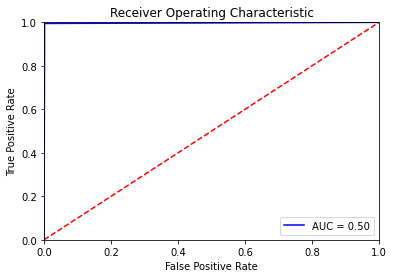

In [ ]:
#print(classification_report(Y_test, y_pred))
fprDTRS, tprDTRS, thresholdDTRS = roc_curve(Y_test, y_dt_rs_pred)
roc_auc = auc(fprDTRS, thresholdDTRS)

plt.title('Receiver Operating Characteristic')
plt.plot(fprDTRS, tprDTRS, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization


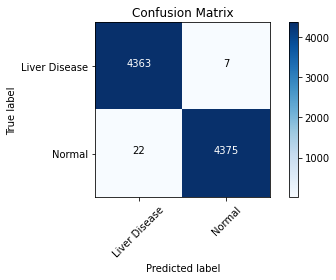

In [ ]:
# Custom method for plotting the Confusion Matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plotting the confussion Matrix
confussionMatrixRF = confusion_matrix(Y_test, y_dt_rs_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(confussionMatrixRF, classes=['Liver Disease','Normal'], title='Confusion Matrix')

*USING GRIDDSEARCH-DT*

In [ ]:
dt_param_grid = {
    'criterion': [dt_randomcv.best_params_['criterion']],
    'max_depth': [dt_randomcv.best_params_['max_depth']],
    'max_features': [dt_randomcv.best_params_['max_features']],
    'min_samples_leaf': [dt_randomcv.best_params_['min_samples_leaf'], 
                         dt_randomcv.best_params_['min_samples_leaf']+2, 
                         dt_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [dt_randomcv.best_params_['min_samples_split'] - 2,
                          dt_randomcv.best_params_['min_samples_split'] - 1,
                          dt_randomcv.best_params_['min_samples_split'], 
                          dt_randomcv.best_params_['min_samples_split'] +1,
                          dt_randomcv.best_params_['min_samples_split'] + 2],
}

print(dt_param_grid)

{'criterion': ['entropy'], 'max_depth': [560], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [0, 1, 2, 3, 4]}


In [ ]:
dt=DecisionTreeClassifier()
dt_gridcv=GridSearchCV(estimator=dt,param_grid=dt_param_grid,n_jobs=-1,cv=10,verbose=2)
dt_gridcv.fit(X_train,Y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a float 

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [560],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [0, 1, 2, 3, 4]},
             verbose=2)

In [ ]:
dt_best_grid_model=dt_gridcv.best_estimator_

In [ ]:
dt_best_grid_model

DecisionTreeClassifier(criterion='entropy', max_depth=560, max_features='sqrt')

In [ ]:
y_dt_gs_pred = dt_best_grid_model.predict(X_test)

In [ ]:
print("DT Accuracy:",accuracy_score(Y_test, y_dt_gs_pred))
print('DT Precision: %.3f' % precision_score(Y_test, y_dt_gs_pred))
print('DT Recall: %.3f' % recall_score(Y_test, y_dt_gs_pred))
print('DT F1 Score: %.3f' % f1_score(Y_test, y_dt_gs_pred))
print('DT Confusion matrix: \n', confusion_matrix(Y_test, y_dt_gs_pred))
print('cohens kappa \n', cohen_kappa_score(Y_test, y_dt_gs_pred))
print('ROC_AUC score \n', roc_auc_score(Y_test, y_dt_gs_pred))

DT Accuracy: 0.997034333295312
DT Precision: 0.998
DT Recall: 0.996
DT F1 Score: 0.997
DT Confusion matrix: 
 [[4362    8]
 [  18 4379]]
cohens kappa 
 0.9940686520053968
ROC_AUC score 
 0.9970378180671345


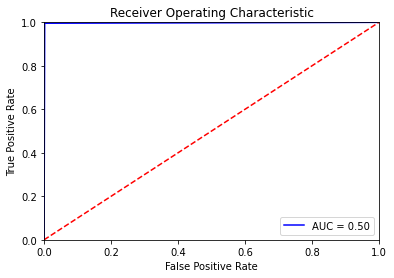

In [ ]:
#print(classification_report(Y_test, y_pred))
fprDTGS, tprDTGS, thresholdDTGS = roc_curve(Y_test, y_dt_gs_pred)
roc_auc = auc(fprDTGS, thresholdDTGS)

plt.title('Receiver Operating Characteristic')
plt.plot(fprDTGS, tprDTGS, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization


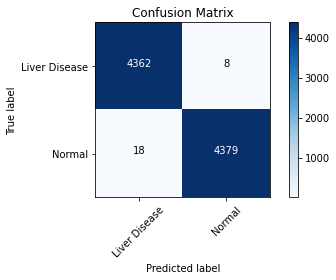

In [ ]:
# Custom method for plotting the Confusion Matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plotting the confussion Matrix
confussionMatrixRF = confusion_matrix(Y_test, y_dt_gs_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(confussionMatrixRF, classes=['Liver Disease','Normal'], title='Confusion Matrix')

**LOGISTIC REGRESSION SEGMENT**

> Indented block



In [ ]:
lr_model=LogisticRegression(random_state=101)
lr_model.fit(X_train, Y_train)

print(lr_model.intercept_)
print(lr_model.coef_)


#Predict
y_lr_pred = lr_model.predict(X_test)

[-0.26]
[[-0.   -0.06  0.01  0.47  0.    0.01  0.    0.14 -0.43 -0.31]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn import metrics
print("LR Accuracy:",accuracy_score(Y_test, y_lr_pred))
print('LR Precision: %.3f' % precision_score(Y_test, y_lr_pred))
print('LR Recall: %.3f' % recall_score(Y_test, y_lr_pred))
print('LR F1 Score: %.3f' % f1_score(Y_test, y_lr_pred))
print('LR Confusion matrix: \n', confusion_matrix(Y_test, y_lr_pred))
print('cohens kappa \n', cohen_kappa_score(Y_test,y_lr_pred))
print('ROC_AUC score \n', roc_auc_score(Y_test,y_lr_pred))

LR Accuracy: 0.6996692140983233
LR Precision: 0.779
LR Recall: 0.560
LR F1 Score: 0.651
LR Confusion matrix: 
 [[3673  697]
 [1936 2461]]
cohens kappa 
 0.399855155181573
ROC_AUC score 
 0.7001016139046333


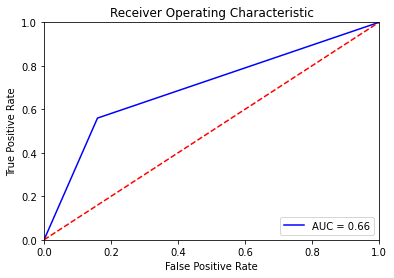

In [ ]:
#print(classification_report(Y_test, y_pred))
fprLR, tprLR, thresholdLR = roc_curve(Y_test, y_lr_pred)
roc_auc = auc(fprLR, thresholdLR)

plt.title('Receiver Operating Characteristic')
plt.plot(fprLR, tprLR, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization


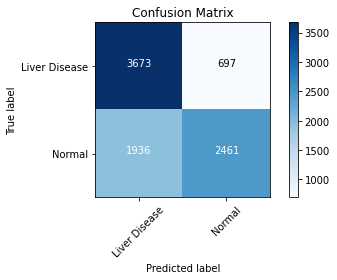

In [ ]:
# Custom method for plotting the Confusion Matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plotting the confussion Matrix
confussionMatrixRF = confusion_matrix(Y_test, y_lr_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(confussionMatrixRF, classes=['Liver Disease','Normal'], title='Confusion Matrix')

***USING RANDOMSEARCH-CV--LR***

In [ ]:
penalty = ['l1', 'l2', 'elasticnet', 'none']
dual = [True , False]
class_weight = ['balanced', 'None']
max_iter = [100,200,250]
lr_random_grid = {'penalty': penalty, 'dual': dual, 'class_weight': class_weight, 'max_iter': max_iter}
print(lr_random_grid)

{'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'dual': [True, False], 'class_weight': ['balanced', 'None'], 'max_iter': [100, 200, 250]}


In [ ]:
lr=LogisticRegression(random_state=101)
lr_randomcv=RandomizedSearchCV(estimator=lr,param_distributions=lr_random_grid,cv=3,verbose=2,random_state=101)
lr_randomcv.fit(X_train,Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END class_weight=None, dual=False, max_iter=100, penalty=l1; total time=   0.0s
[CV] END class_weight=None, dual=False, max_iter=100, penalty=l1; total time=   0.0s
[CV] END class_weight=None, dual=False, max_iter=100, penalty=l1; total time=   0.0s
[CV] END class_weight=balanced, dual=False, max_iter=250, penalty=elasticnet; total time=   0.0s
[CV] END class_weight=balanced, dual=False, max_iter=250, penalty=elasticnet; total time=   0.0s
[CV] END class_weight=balanced, dual=False, max_iter=250, penalty=elasticnet; total time=   0.0s
[CV] END class_weight=balanced, dual=False, max_iter=250, penalty=l1; total time=   0.0s
[CV] END class_weight=balanced, dual=False, max_iter=250, penalty=l1; total time=   0.0s
[CV] END class_weight=balanced, dual=False, max_iter=250, penalty=l1; total time=   0.0s
[CV] END class_weight=None, dual=False, max_iter=100, penalty=elasticnet; total time=   0.0s
[CV] END class_weight=None, dual=

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END class_weight=balanced, dual=False, max_iter=250, penalty=l2; total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END class_weight=balanced, dual=False, max_iter=250, penalty=l2; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END class_weight=balanced, dual=False, max_iter=250, penalty=l2; total time=   1.0s
[CV] END class_weight=balanced, dual=False, max_iter=200, penalty=l1; total time=   0.0s
[CV] END class_weight=balanced, dual=False, max_iter=200, penalty=l1; total time=   0.0s
[CV] END class_weight=balanced, dual=False, max_iter=200, penalty=l1; total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END class_weight=None, dual=False, max_iter=250, penalty=l2; total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END class_weight=None, dual=False, max_iter=250, penalty=l2; total time=   1.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
24 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following

[CV] END class_weight=None, dual=False, max_iter=250, penalty=l2; total time=   1.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


RandomizedSearchCV(cv=3, estimator=LogisticRegression(random_state=101),
                   param_distributions={'class_weight': ['balanced', 'None'],
                                        'dual': [True, False],
                                        'max_iter': [100, 200, 250],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none']},
                   random_state=101, verbose=2)

In [ ]:
lr_randomcv.best_params_

{'class_weight': 'balanced', 'dual': False, 'max_iter': 250, 'penalty': 'l2'}

In [ ]:
lr_randomcv.best_estimator_

LogisticRegression(class_weight='balanced', max_iter=250, random_state=101)

In [ ]:
lr_best_random_model=lr_randomcv.best_estimator_

In [ ]:
lr_best_random_model=lr_randomcv.best_estimator_

In [ ]:
y_lr_rs_pred = lr_best_random_model.predict(X_test)

In [ ]:
print("LR Accuracy:",accuracy_score(Y_test, y_lr_rs_pred))
print('LR Precision: %.3f' % precision_score(Y_test, y_lr_rs_pred))
print('LR Recall: %.3f' % recall_score(Y_test, y_lr_rs_pred))
print('LR F1 Score: %.3f' % f1_score(Y_test, y_lr_rs_pred))
print('LR Confusion matrix: \n', confusion_matrix(Y_test, y_lr_rs_pred))
print('cohens kappa \n', cohen_kappa_score(Y_test, y_lr_rs_pred))
print('ROC_AUC score \n', roc_auc_score(Y_test, y_lr_rs_pred))

LR Accuracy: 0.7026348808030113
LR Precision: 0.797
LR Recall: 0.546
LR F1 Score: 0.648
LR Confusion matrix: 
 [[3759  611]
 [1996 2401]]
cohens kappa 
 0.4058422798138933
ROC_AUC score 
 0.7031185970879875


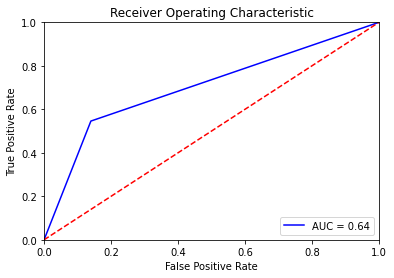

In [ ]:
#print(classification_report(Y_test, y_pred))
fprLRRS, tprLRRS, thresholdLRRS = roc_curve(Y_test, y_lr_rs_pred)
roc_auc = auc(fprLRRS, thresholdLRRS)

plt.title('Receiver Operating Characteristic')
plt.plot(fprLRRS, tprLRRS, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization


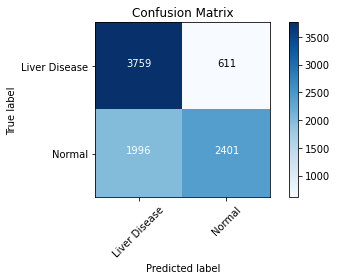

In [ ]:
# Custom method for plotting the Confusion Matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plotting the confussion Matrix
confussionMatrixRF = confusion_matrix(Y_test, y_lr_rs_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(confussionMatrixRF, classes=['Liver Disease','Normal'], title='Confusion Matrix')

***USING GRIDSEARCH-LR***

In [ ]:
penalty = ['l1', 'l2', 'elasticnet', 'none']
dual = [True , False]
class_weight = ['balanced', 'None']
max_iter = [100,200,250]
lr_param_grid = {'penalty': penalty, 'dual': dual, 'class_weight': class_weight, 'max_iter': max_iter}

print(lr_param_grid)

{'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'dual': [True, False], 'class_weight': ['balanced', 'None'], 'max_iter': [100, 200, 250]}


In [ ]:
lr=LogisticRegression()
lr_gridcv=GridSearchCV(estimator=lr,param_grid=lr_param_grid,n_jobs=-1,cv=10,verbose=2)
lr_gridcv.fit(X_train,Y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Sol

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'None'],
                         'dual': [True, False], 'max_iter': [100, 200, 250],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             verbose=2)

In [ ]:
lr_best_grid_model=lr_gridcv.best_estimator_

In [ ]:
lr_best_grid_model

LogisticRegression(class_weight='balanced', max_iter=200, penalty='none')

In [ ]:
y_lr_gs_pred = lr_best_grid_model.predict(X_test)

In [ ]:
print("LR Accuracy:",accuracy_score(Y_test, y_lr_gs_pred))
print('LR Precision: %.3f' % precision_score(Y_test, y_lr_gs_pred))
print('LR Recall: %.3f' % recall_score(Y_test, y_lr_gs_pred))
print('LR F1 Score: %.3f' % f1_score(Y_test, y_lr_gs_pred))
print('LR Confusion matrix: \n', confusion_matrix(Y_test, y_lr_gs_pred))
print('cohens kappa \n', cohen_kappa_score(Y_test, y_lr_gs_pred))
print('ROC_AUC score \n', roc_auc_score(Y_test, y_lr_gs_pred))

LR Accuracy: 0.7030911372191171
LR Precision: 0.795
LR Recall: 0.550
LR F1 Score: 0.650
LR Confusion matrix: 
 [[3746  624]
 [1979 2418]]
cohens kappa 
 0.4067414220189508
ROC_AUC score 
 0.7035643191295916


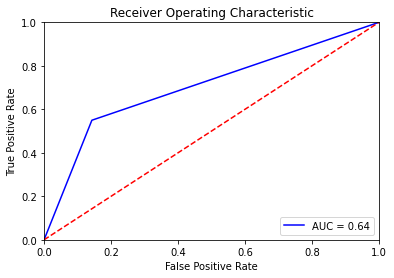

In [ ]:
#print(classification_report(Y_test, y_pred))
fprLRGS, tprLRGS, thresholdLRGS = roc_curve(Y_test, y_lr_gs_pred)
roc_auc = auc(fprLRRS, thresholdLRRS)

plt.title('Receiver Operating Characteristic')
plt.plot(fprLRGS, tprLRGS, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization


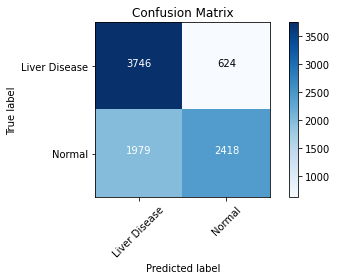

In [ ]:
# Custom method for plotting the Confusion Matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plotting the confussion Matrix
confussionMatrixRF = confusion_matrix(Y_test, y_lr_gs_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(confussionMatrixRF, classes=['Liver Disease','Normal'], title='Confusion Matrix')

NICHER TA BEKAR

In [ ]:
print(metrics.mean_absolute_error(Y_test, y_lr_gs_pred)) 

print(metrics.mean_squared_error(Y_test, y_lr_gs_pred)) 

print(np.sqrt(metrics.mean_squared_error(Y_test, y_lr_gs_pred))) 


0.29690886278088285
0.29690886278088285
0.5448934416754186


**XGBOOST SEGMENT**

In [ ]:
xg_model=XGBClassifier(random_state=101, n_jobs=1)
eval_set=[(X_test,Y_test)]
xg_model.fit(X_train, Y_train, early_stopping_rounds=10, eval_metric='logloss',eval_set=eval_set, verbose= True)
#xg_model.fit(X_train, Y_train)

y_xg_pred=xg_model.predict(X_test)

[0]	validation_0-logloss:0.667237
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.64733
[2]	validation_0-logloss:0.628687
[3]	validation_0-logloss:0.614542
[4]	validation_0-logloss:0.601878
[5]	validation_0-logloss:0.58913
[6]	validation_0-logloss:0.578465
[7]	validation_0-logloss:0.569735
[8]	validation_0-logloss:0.561385
[9]	validation_0-logloss:0.554372
[10]	validation_0-logloss:0.548468
[11]	validation_0-logloss:0.541576
[12]	validation_0-logloss:0.535099
[13]	validation_0-logloss:0.529954
[14]	validation_0-logloss:0.524635
[15]	validation_0-logloss:0.518546
[16]	validation_0-logloss:0.514015
[17]	validation_0-logloss:0.509441
[18]	validation_0-logloss:0.506859
[19]	validation_0-logloss:0.502858
[20]	validation_0-logloss:0.500963
[21]	validation_0-logloss:0.496618
[22]	validation_0-logloss:0.494896
[23]	validation_0-logloss:0.493305
[24]	validation_0-logloss:0.49185
[25]	validation_0-logloss:0.488279
[26]	validation_0-logloss:0.486929


In [ ]:
print("XG Accuracy:",accuracy_score(Y_test, y_xg_pred))
print('XG Precision: %.3f' % precision_score(Y_test, y_xg_pred))
print('XG Recall: %.3f' % recall_score(Y_test, y_xg_pred))
print('XG F1 Score: %.3f' % f1_score(Y_test, y_xg_pred))
print('XG Confusion matrix: \n', confusion_matrix(Y_test, y_xg_pred))
print('cohens kappa \n', cohen_kappa_score(Y_test, y_xg_pred))
print('ROC_AUC score \n', roc_auc_score(Y_test, y_xg_pred))

XG Accuracy: 0.8607277289836889
XG Precision: 0.954
XG Recall: 0.759
XG F1 Score: 0.845
XG Confusion matrix: 
 [[4210  160]
 [1061 3336]]
cohens kappa 
 0.7216290317182505
ROC_AUC score 
 0.8610429203601998


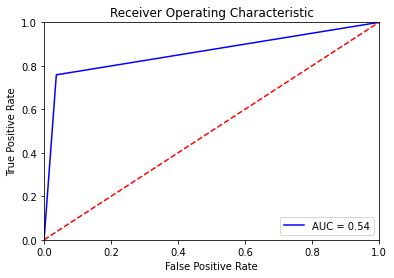

In [ ]:
#print(classification_report(Y_test, y_pred))
fprXG, tprXG, thresholdXG = roc_curve(Y_test, y_xg_pred)
roc_auc = auc(fprXG, thresholdXG)

plt.title('Receiver Operating Characteristic')
plt.plot(fprXG, tprXG, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization


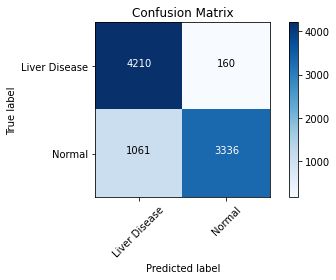

In [ ]:
# Custom method for plotting the Confusion Matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plotting the confussion Matrix
confussionMatrixRF = confusion_matrix(Y_test, y_xg_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(confussionMatrixRF, classes=['Liver Disease','Normal'], title='Confusion Matrix')

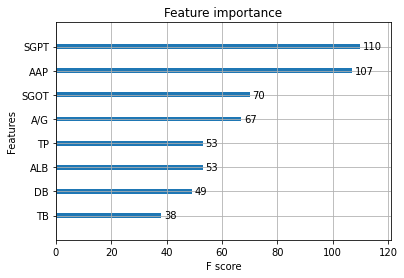

In [ ]:
from xgboost import plot_importance
plot_importance(xg_model)
plt.show()

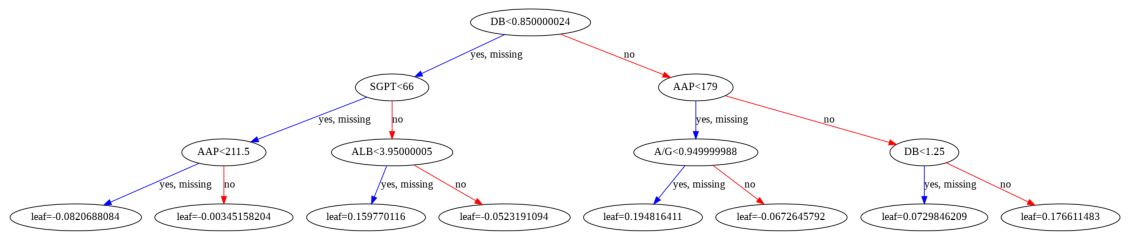

In [ ]:
import xgboost as xgb
plt.figure(figsize=(20,15))
xgb.plot_tree(xg_model, ax=plt.gca())

*****USING RANDOMSEARCH-CV--XGB*****

In [ ]:
#for hyperparameter tuning

xg_RS_params={"learning_rate" :[0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
           "max_depth" : [3,4,5,6,7,10,12,15],
           "min_child_weight": [1,5,9],
           "gamma" : [0.0,0.1,0.2,0.3,0.4,0.5]}
           #"colsample_bytree"  : [0.3 ,0.4 ,0.5 ,0.7]
           

print(xg_RS_params)           

{'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3], 'max_depth': [3, 4, 5, 6, 7, 10, 12, 15], 'min_child_weight': [1, 5, 9], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]}


In [ ]:
xg_rs_model = XGBClassifier()
xg_randomcv=RandomizedSearchCV(xg_rs_model, param_distributions=xg_RS_params, n_iter=5, n_jobs=-1, cv=5, verbose=2, scoring= 'roc_auc',random_state=102)
xg_randomcv.fit(X_train,Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 5, 9]},
                   random_state=102, scoring='roc_auc', verbose=2)

In [ ]:
xg_randomcv.best_estimator_

XGBClassifier(gamma=0.1, learning_rate=0.25, max_depth=10, min_child_weight=5)

In [ ]:
xg_randomcv.best_params_

{'gamma': 0.1, 'learning_rate': 0.25, 'max_depth': 10, 'min_child_weight': 5}

In [ ]:
xg_best_random_model= xg_randomcv.best_estimator_

In [ ]:
y_xg_RS_pred = xg_best_random_model.predict(X_test)

In [ ]:
print("XG Accuracy:",accuracy_score(Y_test, y_xg_RS_pred))
print('XG Precision: %.3f' % precision_score(Y_test, y_xg_RS_pred))
print('XG Recall: %.3f' % recall_score(Y_test,y_xg_RS_pred))
print('XG F1 Score: %.3f' % f1_score(Y_test, y_xg_RS_pred))
print('XG Confusion matrix: \n', confusion_matrix(Y_test,y_xg_RS_pred))
print('cohens kappa \n', cohen_kappa_score(Y_test, y_xg_RS_pred))
print('ROC_AUC score \n', roc_auc_score(Y_test, y_xg_RS_pred))

XG Accuracy: 0.998745294855709
XG Precision: 0.999
XG Recall: 0.999
XG F1 Score: 0.999
XG Confusion matrix: 
 [[4364    6]
 [   5 4392]]
cohens kappa 
 0.9974905641470035
ROC_AUC score 
 0.9987449316649745


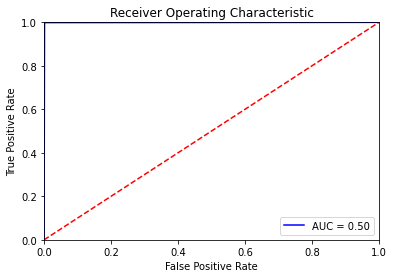

In [ ]:
#print(classification_report(Y_test, y_pred))
fprXGRS, tprXGRS, thresholdXGRS = roc_curve(Y_test, y_xg_RS_pred)
roc_auc = auc(fprXGRS, thresholdXGRS)

plt.title('Receiver Operating Characteristic')
plt.plot(fprXGRS, tprXGRS, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization


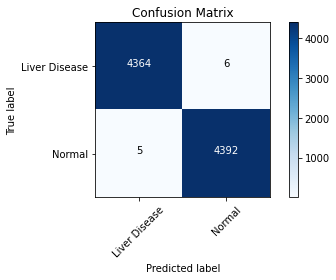

In [ ]:
# Custom method for plotting the Confusion Matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plotting the confussion Matrix
confussionMatrixRF = confusion_matrix(Y_test, y_xg_RS_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(confussionMatrixRF, classes=['Liver Disease','Normal'], title='Confusion Matrix')

***USING GRIDSEARCH-LR***

In [ ]:
xg_gs_params= {"learning_rate" :[0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
           "max_depth" : [3,4,5,6,7,10,12,15],
           "min_child_weight": [1,5,9],
           "gamma" : [0.0,0.1,0.2,0.3,0.4,0.5]}

print(xg_gs_params)

{'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3], 'max_depth': [3, 4, 5, 6, 7, 10, 12, 15], 'min_child_weight': [1, 5, 9], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]}


In [ ]:
xg_gs_model= XGBClassifier()
#xg = xgb.XGBClassifier()
xg_gridcv = GridSearchCV(estimator=xg_gs_model, param_grid=xg_gs_params, n_jobs=-1, cv=5, scoring="roc_auc")
xg_gridcv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                         'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                         'max_depth': [3, 4, 5, 6, 7, 10, 12, 15],
                         'min_child_weight': [1, 5, 9]},
             scoring='roc_auc')

In [ ]:
xg_gridcv.best_estimator_

XGBClassifier(gamma=0.0, learning_rate=0.15, max_depth=15)

In [ ]:
xg_gridcv.best_params_

{'gamma': 0.0, 'learning_rate': 0.15, 'max_depth': 15, 'min_child_weight': 1}

In [ ]:
xg_best_grid_model= xg_gridcv.best_estimator_

In [ ]:
y_xg_gs_pred = xg_best_grid_model.predict(X_test)

In [ ]:
print("XG Accuracy:",accuracy_score(Y_test, y_xg_gs_pred))
print('XG Precision: %.3f' % precision_score(Y_test, y_xg_gs_pred))
print('XG Recall: %.3f' % recall_score(Y_test,y_xg_gs_pred))
print('XG F1 Score: %.3f' % f1_score(Y_test, y_xg_gs_pred))
print('XG Confusion matrix: \n', confusion_matrix(Y_test, y_xg_gs_pred))
print('cohens kappa \n', cohen_kappa_score(Y_test, y_xg_gs_pred))
print('ROC_AUC score \n', roc_auc_score(Y_test, y_xg_gs_pred))

XG Accuracy: 0.9992015512718148
XG Precision: 0.999
XG Recall: 0.999
XG F1 Score: 0.999
XG Confusion matrix: 
 [[4367    3]
 [   4 4393]]
cohens kappa 
 0.998403088519284
ROC_AUC score 
 0.99920189498873


In [ ]:
#print(classification_report(Y_test, y_pred))
fprXGGS, tprXGGS, thresholdXGGS = roc_curve(Y_test, y_xg_gs_pred)
roc_auc = auc(fprGS, thresholdGS)

plt.title('Receiver Operating Characteristic')
plt.plot(fprXGGS, tprXGGS, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

NameError: ignored

In [ ]:
# Custom method for plotting the Confusion Matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plotting the confussion Matrix
confussionMatrixRF = confusion_matrix(Y_test, y_xg_gs_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(confussionMatrixRF, classes=['Liver Disease','Normal'], title='Confusion Matrix')